## Machine Learning - Ex.5


Submitted by: Raz Gvili

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

### 1. Linear SVM (2-D example)

In this exercise we will use **sklearn** library's implementation of the SVM classifier:

<http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>


In [21]:
from sklearn import svm

Use their SVC module to train a **linear** SVM classifier on the following dataset.

Set the SVC parameters with kernel='linear' and C=10000.

- Use the `predict` method to count how many examples were misclassified.

- Use the `decision_function` method to visualize decision function $Z(x_1,x_2)$ over the relevant $(x_1,x_2)$ region (using meshgrid and contour functions).

- Mark the decision boundary ($Z=0$) and the margin lines ($Z=-1$ and $Z=1$).

- Use the 'support_' attribute to mark the *support-vectors* points.

Hint: <http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html>

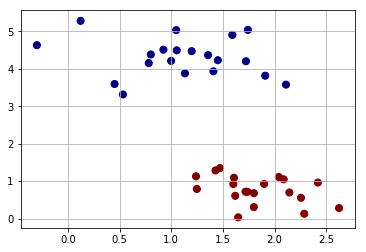

In [22]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=40, centers=2, n_features=2, random_state=0,cluster_std=0.5)
plt.scatter(X[:,0],X[:,1],50,y,cmap=plt.cm.jet)
plt.grid()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split Data - 90% training and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)


#Create a svm Classifier
    # Linear Kernel
    # Penalty parameter C of the error term.
    
Classifier = svm.SVC(kernel='linear', C=10000, decision_function_shape='ovr') 

#Train the model using the training sets
Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = Classifier.predict(X_test)

# Model Accuracy
print('Accuracy:', (metrics.accuracy_score(y_test, y_pred)*100))




Accuracy: 100.0


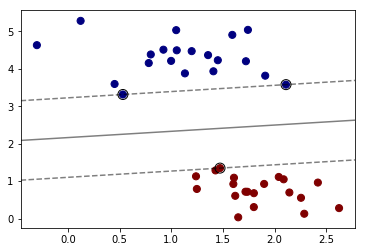

In [24]:
plt.scatter(X[:,0],X[:,1],50,y,cmap=plt.cm.jet)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = Classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(Classifier.support_vectors_[:, 0], Classifier.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### 2.  The hand-written DIGITS dataset

In this exercise we will try to learn the DIGITS dataset. 
The dataset contains almost 2000 examples of hand written digits:
$$y_i\in\{0,1,2,...,9\}$$


Each sample is represented by a 64 features vector (bitmap of 8x8 pixels):
$$x_i\in R^{64}$$

Lets plot a few examples from the dataset:

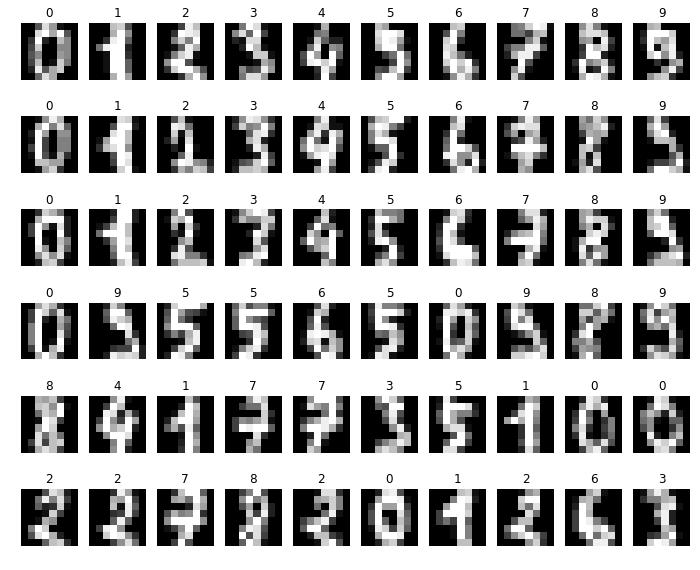

In [25]:
from sklearn import datasets

digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target


plt.figure(figsize=(12,10))
for i in range(60):
    plt.subplot(6,10,i+1)
    plt.axis('off')

    plt.imshow(X[i,:].reshape(8,8),cmap='gray')
    plt.title(y[i])
plt.show()

- Extract from the full dataset only the examples of 'threes' (y=3) and 'eights' (y=8). We will use the SVM to learn a binary classifier to classify between these two categories ('three' vs 'eight').

- Use about 80% of the examples to train the SVM classifier. 

- Use the `predict` method to count how many training examples were misclassified.

- Display all the support vectors of the classifier (reshape each one to 8x8 in order to display it).

- Use the classifier over the remaining 20% examples. How many were misclassified? Display all the misclassified examples.

In [26]:
# Font config for plot title
font = {
'family': 'serif',
'color':  'darkred',
'weight': 'normal',
'size': 12,
}

Accuracy: 90.27777777777779

Misclassified samples: 34.70833333333331

Number of support vectors: 25

Printing support vectors images...


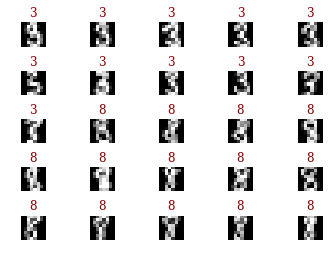


Accuracy after training in 100% of the data: 100.0



In [30]:
# load the dataset
digits = datasets.load_digits() 

# Extract specific digits - images and results 

digit_3_n_8 = []

y_3_8 = []

for i in range (digits.data.shape[0]):
    if (digits.target[i] == 3 or digits.target[i] == 8):
        digit_3_n_8.append(digits.images[i])
        y_3_8.append(digits.target[i])

digit_3_n_8 = np.asarray(digit_3_n_8)

nsamples, nx, ny = digit_3_n_8.shape
digit_3_n_8 = digit_3_n_8.reshape((nsamples,nx*ny))


# Split Data - 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(digit_3_n_8, y_3_8, test_size=0.2, shuffle=False)

Classifier_3_8 = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr') 


# Train the model using the training sets
Classifier_3_8.fit(X_train, y_train)


# Predict the response for test dataset
y_pred = Classifier_3_8.predict(X_test)


# Model Accuracy calc
Acc = metrics.accuracy_score(y_test, y_pred)*100
Number_of_3_8_sampels = len(y_3_8)

print('Accuracy:', Acc)
print()
print("Misclassified samples:", Number_of_3_8_sampels*(((100-Acc)/100)))
print()

# Support Vectors
Num_of_support_vectors = Classifier_3_8.support_.shape[0]
SV_Indices = Classifier_3_8.support_
SV = Classifier_3_8.support_vectors_

print("Number of support vectors:", Num_of_support_vectors)
print()

print("Printing support vectors images...")

for i in range(Num_of_support_vectors):
    plt.subplot(5,5,i+1)
    plt.axis('off')

    plt.imshow(SV[i,:].reshape(8,8),cmap='gray')
    plt.title(y_train[SV_Indices[i]], fontdict=font)

plt.subplots_adjust(hspace=1)
plt.show()


# Use the classifier over the remaining 20% examples
Classifier_3_8.fit(digit_3_n_8, y_3_8)

# Predict the response for test dataset

y_pred = Classifier_3_8.predict(X_test)

Acc = metrics.accuracy_score(y_test, y_pred)*100
print()
print('Accuracy after training in 100% of the data:', Acc)
print()
